## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [4]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [6]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### There are null values in BMI

In [10]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
dataset.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## Data Visualisation

In [15]:
corr=dataset.corr()
corr.style.background_gradient(cmap ='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### Heatmap correlation

<AxesSubplot:>

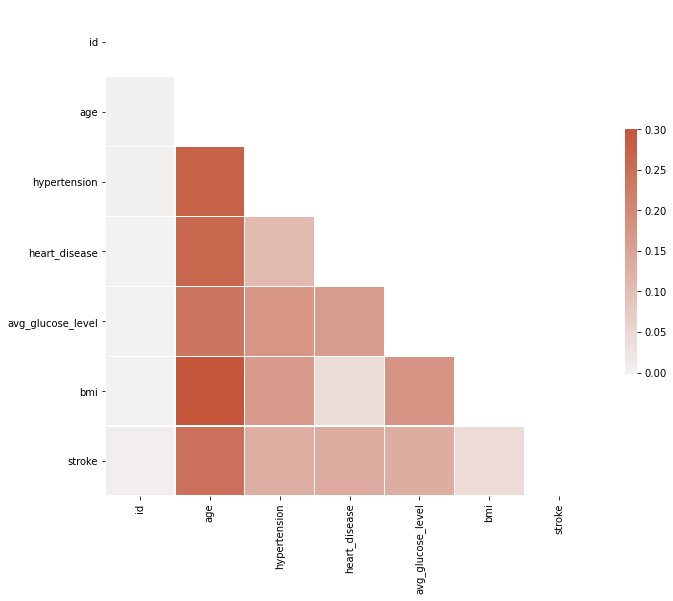

In [16]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Count Plot

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


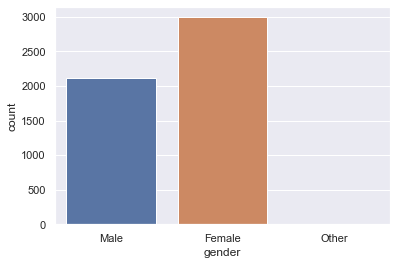

In [20]:
print(dataset.gender.value_counts())
ax = sns.countplot(data=dataset, x="gender")
plt.show()

0    4612
1     498
Name: hypertension, dtype: int64


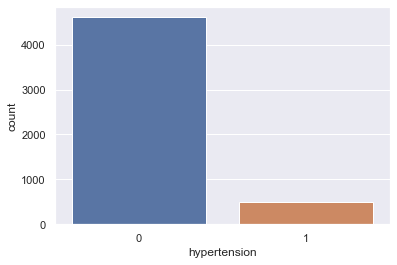

In [28]:
print(dataset.hypertension.value_counts())
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

Yes    3353
No     1757
Name: ever_married, dtype: int64


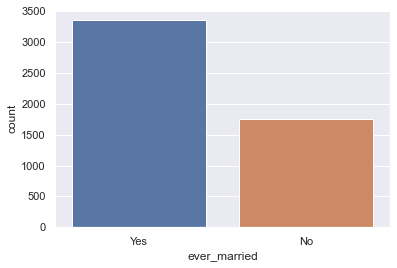

In [25]:
print(dataset.ever_married.value_counts())
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


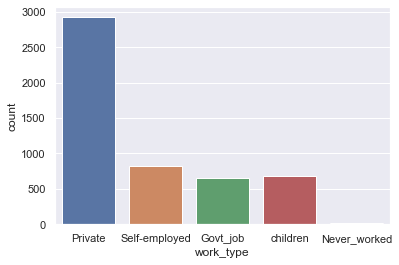

In [24]:
print(dataset.work_type.value_counts())
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


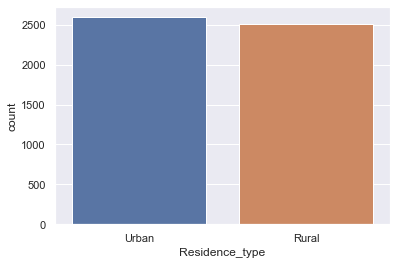

In [29]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


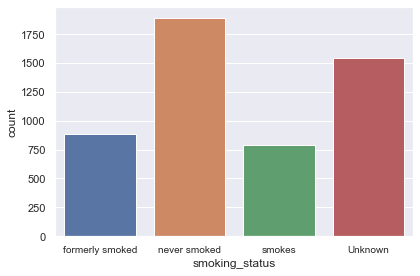

In [30]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

0    4861
1     249
Name: stroke, dtype: int64


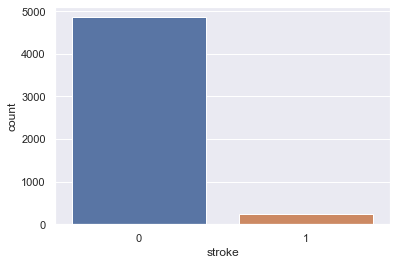

In [31]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

### Distribution Plot

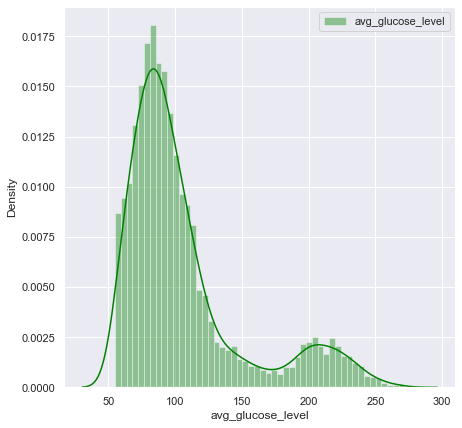

In [33]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

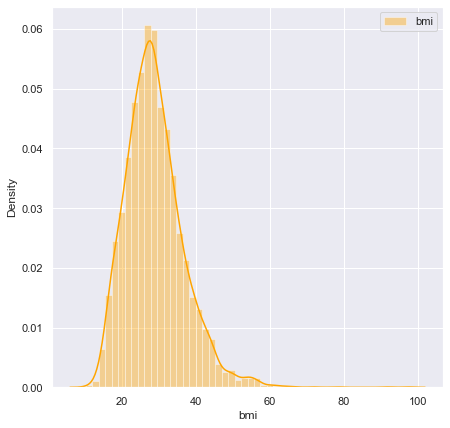

In [34]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

### No stroke vs stroke by BMI

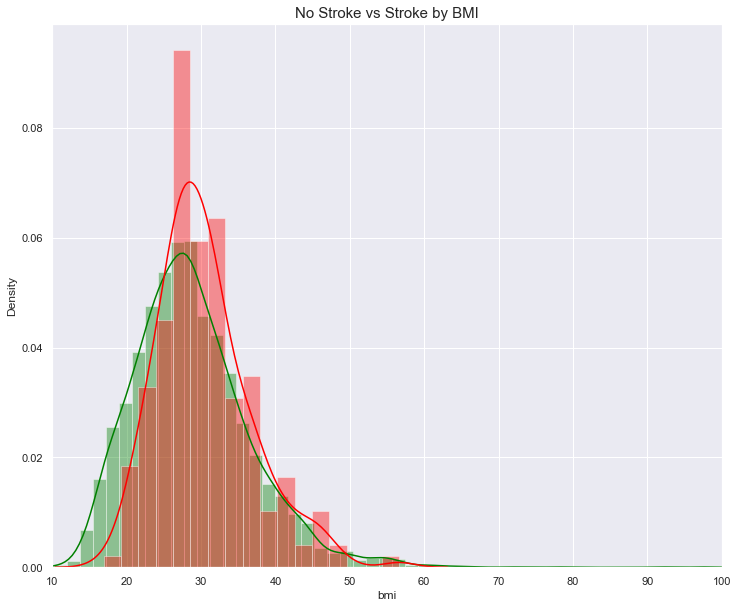

In [35]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

#### From the graph, it shows that the density of overweight people who suffered a stroke is more.

### No Stroke vs Stroke by Avg. Glucose Level 

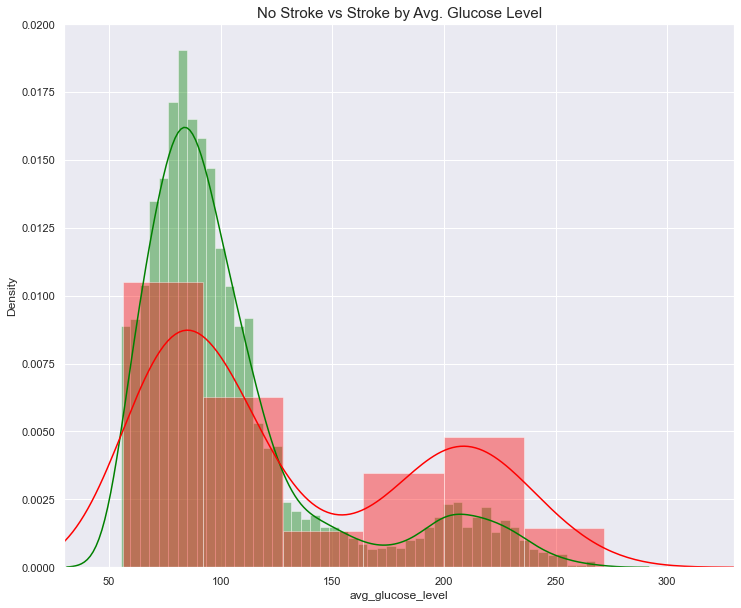

In [36]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

#### From graph, it shows that the density of people having glucose level less than 100 suffered stroke more.

### No Stroke vs Stroke by Age

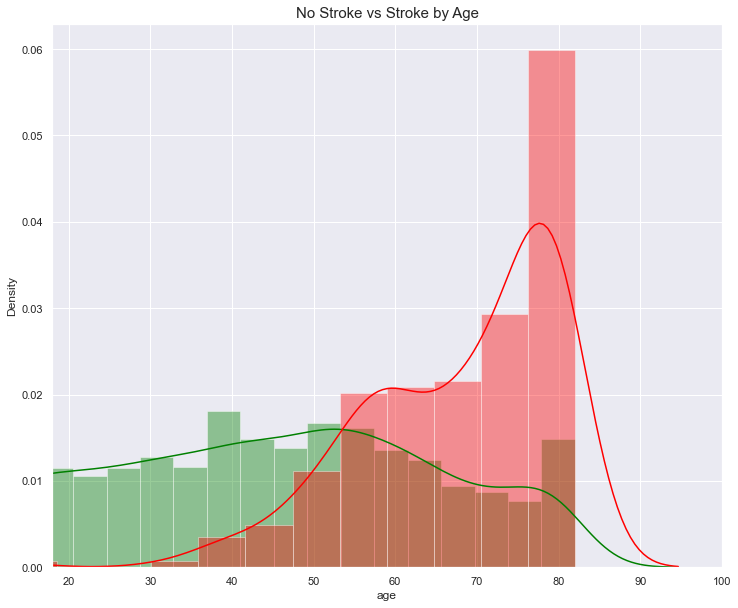

In [37]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

#### From graph, it can be seen that the density of people having age above 50 suffered stroke more.

## Scatter Plot 

### Age vs BMI 

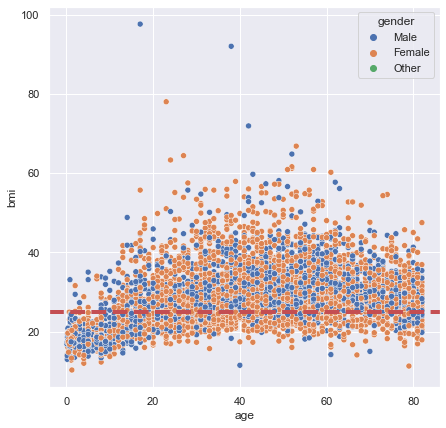

In [38]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

#### From above plot, we can see that there are lot of people having BMI above 25 are overweight and obese.

### Age vs Avg. Glucose Level 

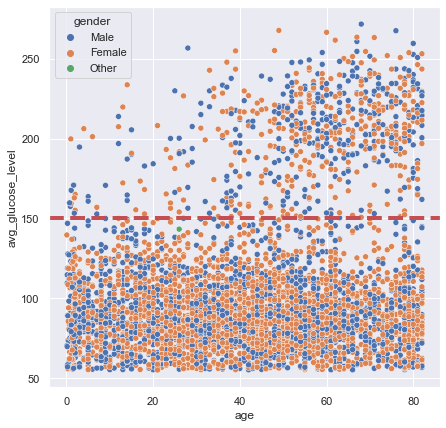

In [39]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

#### From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.